In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
#import plotly.plotly as py
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics


In [18]:
df_train = pd.read_csv("train.csv")
df_train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
df_train.count()


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [20]:
df_train.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [21]:
df_train["Age"]=df_train["Age"].fillna(0)
df_train["Embarked"]=df_train["Embarked"].fillna(0)
df_train["Embarked"][df_train["Embarked"] == "S"] = 0
df_train["Embarked"][df_train["Embarked"] == "C"] = 1
df_train["Embarked"][df_train["Embarked"] == "Q"] = 2
df_train["Sex"][df_train["Sex"] == "female"] = 0
df_train["Sex"][df_train["Sex"] != "female"] = 1
df_train["Cabin"]=df_train["Cabin"].fillna(0)
#print (df_train)

C:\Users\nandan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\nandan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\nandan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\nandan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__mai

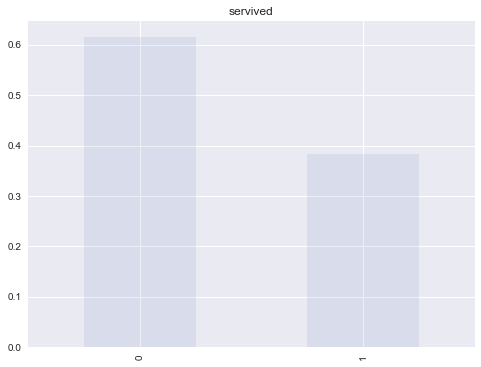

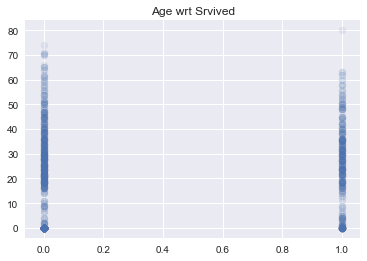

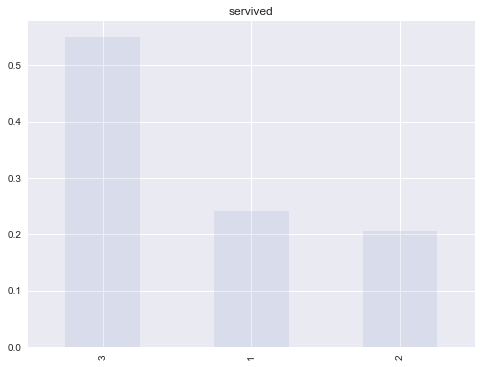

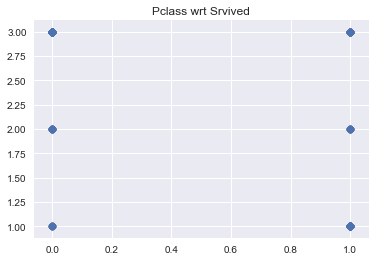

In [22]:
fig = plt.figure(figsize = (8,6))
X = df_train.Survived.value_counts(normalize=True).plot(kind='bar',alpha=0.1)# normalized makes plot in %
plt.title("servived")
plt.show()

#plt.subplot2grid((4,4),(2,2))
plt.scatter(df_train.Survived,df_train.Age,alpha =0.1)
plt.title("Age wrt Srvived")
#Y = train.Age.value_counts().plot(kind='bar',alpha=0.5)

plt.show()

fig = plt.figure(figsize = (8,6))
X = df_train.Pclass.value_counts(normalize=True).plot(kind='bar',alpha=0.1)# normalized makes plot in %
plt.title("servived")
plt.show()
# more than 35% peoples survied, class 3 people are more than 50%

plt.scatter(df_train.Survived,df_train.Pclass,alpha =0.1)
plt.title("Pclass wrt Srvived")
#Y = train.Age.value_counts().plot(kind='bar',alpha=0.5)

plt.show()



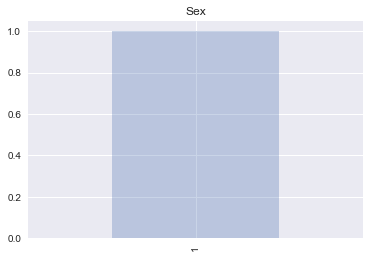

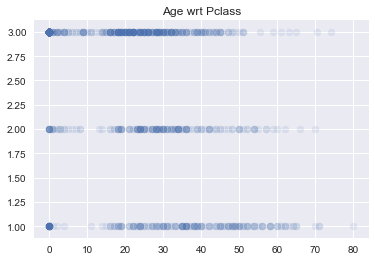

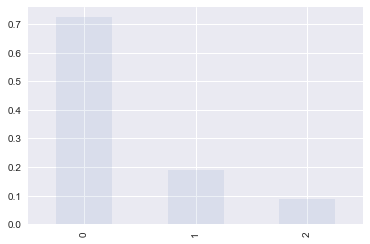

In [23]:
df_train.Sex.value_counts(normalize=True).plot(kind='bar',alpha=0.3)# normalized makes plot in %
plt.title("Sex")
plt.show()

plt.scatter(df_train.Age,df_train.Pclass,alpha =0.1)
plt.title("Age wrt Pclass")
#Y = train.Age.value_counts().plot(kind='bar',alpha=0.5)

plt.show()
# class 3 has mas people and mostly died 

#fig = plt.figure(figsize = (8,6))
X = df_train.Embarked.value_counts(normalize=True).plot(kind='bar',alpha=0.1)# normalized makes plot in %
plt.show()

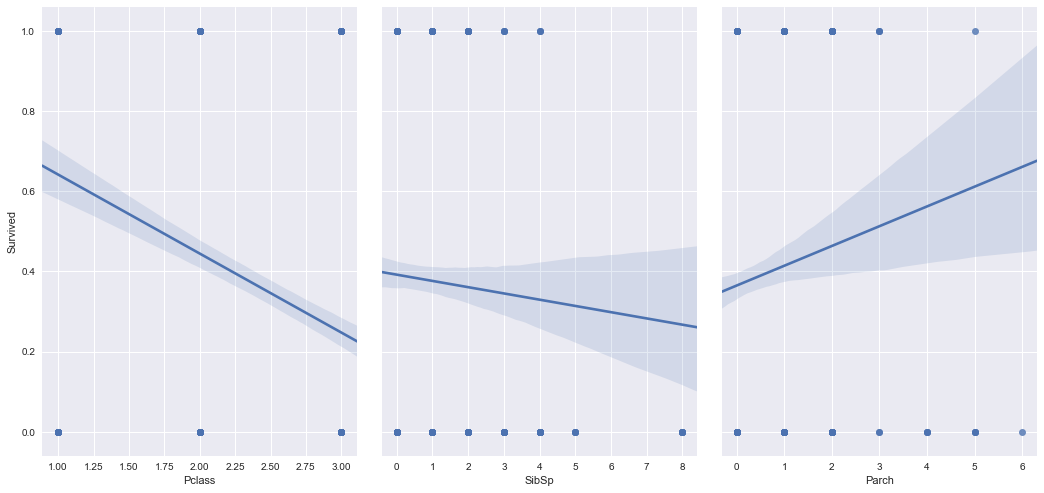

In [24]:
import seaborn as sns
#ns.pairplot(df_train, x_vars=['Sex','Age','Pclass','SibSp'],y_vars='Survived',size =7, aspect = 0.7, kind='reg')
sns.pairplot(df_train, x_vars=['Pclass','SibSp','Parch'],y_vars='Survived',size =7, aspect = 0.7, kind='reg')


In [25]:

#x = train[feature_cols]
x = df_train[['Pclass','Fare','SibSp','Parch','Sex','Embarked']]

y = df_train[['Survived']]

# sklearn linaer refgression

classifier = linear_model.LogisticRegression()
classifier_ = classifier.fit(x,y)

print(classifier_.score(x,y))


0.686868686869


C:\Users\nandan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0


In [29]:
df_test = pd.read_csv("test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
